In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
help(pd.DataFrame.groupby)

Help on function groupby in module pandas.core.frame:

groupby(self, by=None, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool | lib.NoDefault' = <no_default>, squeeze: 'bool | lib.NoDefault' = <no_default>, observed: 'bool' = False, dropna: 'bool' = True) -> 'DataFrameGroupBy'
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first

In [5]:
titanic=sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# 필요한 컬럼 골라내기
df=titanic[['age','sex','class', 'fare', 'survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [7]:
grouped=df.groupby(['class'])
grouped.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
6,54.0,male,First,51.8625,0
7,2.0,male,Third,21.0750,0
9,14.0,female,Second,30.0708,1
11,58.0,female,First,26.5500,1


In [8]:
for key, group in grouped:
    print(key, group)

First       age     sex  class     fare  survived
1    38.0  female  First  71.2833         1
3    35.0  female  First  53.1000         1
6    54.0    male  First  51.8625         0
11   58.0  female  First  26.5500         1
23   28.0    male  First  35.5000         1
..    ...     ...    ...      ...       ...
871  47.0  female  First  52.5542         1
872  33.0    male  First   5.0000         0
879  56.0  female  First  83.1583         1
887  19.0  female  First  30.0000         1
889  26.0    male  First  30.0000         1

[216 rows x 5 columns]
Second       age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24.0000         1
880  25.0  female  Second  26.

C:\Users\USER\AppData\Local\Temp\ipykernel_19360\4187541178.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped:


In [9]:
# 그룹별 집계가 가능함.
print(grouped.mean())

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363


C:\Users\USER\AppData\Local\Temp\ipykernel_19360\3693953336.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped.mean())


In [ ]:
# 개별 그룹 가져오기
group2= groupted

In [10]:
# 
grouped_two=df.groupby(['class','sex'])
for key, groupt in grouped_two:
    print(key)

('First', 'female')
('First', 'male')
('Second', 'female')
('Second', 'male')
('Third', 'female')
('Third', 'male')


In [13]:
# 집계 함수 사용
# print(grouped.std())
# 특정 컬럼
print(grouped['fare'].std())
print(grouped.fare.std()) 
# . 을 이용해서 컬럼에 접근할 때는 반드시 컬럼이름이 문자열이어야 합니다.

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64
class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


In [21]:
# 사용자 정의 함수 적용
# group에 ~ 를 이용해서 적용하게 된다면 매개변수로 각 그룹이 대입되는 구조
def f(group):
    return (group.max(), group.min())
# 하나의 함수 적용
agg_f=grouped.agg(f)
print(agg_f)
# 여러 개의 함수 적용
agg_two=grouped.agg([min,max])
print(agg_two)
# 컬럼 마다 다른 함수 적용
agg_three=grouped.agg({'fare':min,'sex':max})
print(agg_three)
#groupby 는 집계함수와 사용자 정의 함수만 써야 합니다.

                 age             sex             fare survived
class                                                         
First   (80.0, 0.92)  (male, female)  (512.3292, 0.0)   (1, 0)
Second  (70.0, 0.67)  (male, female)      (73.5, 0.0)   (1, 0)
Third   (74.0, 0.42)  (male, female)     (69.55, 0.0)   (1, 0)
         age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1
        fare   sex
class             
First    0.0  male
Second   0.0  male
Third    0.0  male


In [25]:
# 셀 단위로 함수 적용 - transform이나 apply를 사용합니다.
def z_score(x):
    return (x-x.mean())/x.std()
age_zscore=grouped.age.transform(z_score)
print(age_zscore.head())
# SQL의 Having(Group By 이후의 조건- 그룹화한 하옴ㄱ의 필터링)-을 만들고자 할 때는 filter 함수를 이용합니다.
# 그룹화한 항목의 필터링은 그룹의 집계함수를 이용해서 필터링을 수행해야 합니다.
# 행의 개수가 300개가 넘는 그룹의 데이터만 추출을 해보자.
group_filter=grouped.filter(lambda x: len(x)>300)
print(group_filter)

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64
      age     sex  class     fare  survived
0    22.0    male  Third   7.2500         0
2    26.0  female  Third   7.9250         1
4    35.0    male  Third   8.0500         0
5     NaN    male  Third   8.4583         0
7     2.0    male  Third  21.0750         0
..    ...     ...    ...      ...       ...
882  22.0  female  Third  10.5167         0
884  25.0    male  Third   7.0500         0
885  39.0  female  Third  29.1250         0
888   NaN  female  Third  23.4500         0
890  32.0    male  Third   7.7500         0

[491 rows x 5 columns]


In [30]:
# multi index
print(df)
# 2개의 컬럼으로 그룹화 - 멀티 인덱스 생성
grouped=df.groupby(['class','sex'])
# First class 이고 sex가 male인 데이터만 골라보자.
gdf=grouped.mean()
print(gdf.loc[('First','male')])
print(gdf.xs('male', level='sex'))
# loc로 보통 하게 된답니다.

      age     sex   class     fare  survived
0    22.0    male   Third   7.2500         0
1    38.0  female   First  71.2833         1
2    26.0  female   Third   7.9250         1
3    35.0  female   First  53.1000         1
4    35.0    male   Third   8.0500         0
..    ...     ...     ...      ...       ...
886  27.0    male  Second  13.0000         0
887  19.0  female   First  30.0000         1
888   NaN  female   Third  23.4500         0
889  26.0    male   First  30.0000         1
890  32.0    male   Third   7.7500         0

[891 rows x 5 columns]
age         41.281386
fare        67.226127
survived     0.368852
Name: (First, male), dtype: float64
              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447


In [31]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'str' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Groupe

In [32]:
print(pd.pivot_table(df,index='sex',columns='class', values='age', aggfunc='mean'))

class       First     Second      Third
sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589


##  서울시 구별 CCTV와 인구 데이터 사용

### 필요 라이브러리 Import

In [35]:
import numpy as np
import pandas as pd
# 시각화패키지
import matplotlib.pyplot as plt
# 시각화 할 때, 한글 출력을 위함
import platform
from matplotlib import font_manager, rc

### 데이터 읽어오기

In [36]:
cctv=pd.read_excel('./data/cctv.xlsx')
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [38]:
# pop.txt는 첫 두 행은 의미가 없다.
# 한글을 포함한다.
# 구분 기호는 탭
# 천 단위 구분 기호가 존재함
pop=pd.read_csv('./data/pop.txt', skiprows=2, delimiter='\t', thousands=',')
pop.head()
# 계 1, 남자1,... 이런 것은 컬럼 이름이 똑같기에 자동 변경을 한 것이다.

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,4405638,9795426,4756178,5039248,9565990,4649442,4916548,229436,106736,122700,2.17,1576971
1,2021.2/4,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
2,2021.2/4,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
3,2021.2/4,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
4,2021.2/4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591


### 데이터 구조 확인하기

In [37]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [39]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        26 non-null     object 
 1   자치구       26 non-null     object 
 2   세대        26 non-null     int64  
 3   계         26 non-null     int64  
 4   남자        26 non-null     int64  
 5   여자        26 non-null     int64  
 6   계.1       26 non-null     int64  
 7   남자.1      26 non-null     int64  
 8   여자.1      26 non-null     int64  
 9   계.2       26 non-null     int64  
 10  남자.2      26 non-null     int64  
 11  여자.2      26 non-null     int64  
 12  세대당인구     26 non-null     float64
 13  65세이상고령자  26 non-null     int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 3.0+ KB


### 데이터 정보 수정하기 (컬럼 등..)

pandase의 DataFrame이나 Series의 편집 함수들은 대부분 데이터를 복제해서 작업 후 리턴을 하는데,<br>
분석을 아주 길게 해야 되는 경우, 이 방식은 메모리를 많이 사용하게 됩니다.

pandas에서는 대다수의 편집 함수에 어쩌구

In [40]:
cctv.rename(columns={cctv.columns[0]:'구별'}, inplace=True)
pop.rename(columns={pop.columns[1]:'구별'}, inplace=True)
# CCTV의 구별 데이터는 중간에 공백이 존재하고, pop은 구 이름에는 공백이 없음
gu=[]
for x in cctv['구별']:
    gu.append(x.replace(' ', ''))
cctv['구별']=gu
cctv.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


### 불필요한 열과 행 제거 

데이터에서 직접 제거해도 되고, 원하는 데이터만 추출해도 됩니다.

In [41]:
# pop 데이터에서 기간, 구별, 계, 남자, 여자 열만 필요하다.
pop=pop[['기간', '구별', '계', '남자', '여자']]
# pop 데이터의 첫 번째 행의 전체 데이터의 집계라서 불필요 합니다.
pop.drop([0], inplace=True)
#새로운 열을 추가합니다. - 없는 열 이름에 데이터를 대입하면 됩니다.
pop['여성비율']=pop['여자']/pop['계']*100
pop.head()

,기간,구별,계,남자,여자,여성비율
1,2021.2/4,종로구,155106,75009,80097,51.640169
2,2021.2/4,중구,132259,64526,67733,51.212394
3,2021.2/4,용산구,240665,116858,123807,51.443708
4,2021.2/4,성동구,295767,143927,151840,51.337708
5,2021.2/4,광진구,355306,170624,184682,51.978295


### 2개의 데이터 프레임 결합  - merge / join 이용

In [42]:
df=pd.merge(cctv, pop, on='구별')
df.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,기간,계,남자,여자,여성비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,2021.2/4,536107,256449,279658,52.164587
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,2021.2/4,469094,230388,238706,50.886603
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,2021.2/4,306093,148824,157269,51.379483
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,2021.2/4,582995,280822,302173,51.831148
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,2021.2/4,502698,251713,250985,49.927591


### 결합된 데이터 프레임에서 불필요한 컬럼 삭제

In [43]:
# 2018 이전 버전은 안보고 싶다.
# del을 이용해보자. (pandas에서는 비추천)
del df['2011년 이전']
del df['2012년']
del df['2013년']
del df['2014년']
del df['2015년']
del df['2016년']
del df['2017년']
del df['기간']
df.head()

,구별,소계,2018년,계,남자,여자,여성비율
0,강남구,5221,448,536107,256449,279658,52.164587
1,강동구,1879,385,469094,230388,238706,50.886603
2,강북구,1265,319,306093,148824,157269,51.379483
3,강서구,1617,254,582995,280822,302173,51.831148
4,관악구,3985,671,502698,251713,250985,49.927591


### 인덱스 재설정하기

Series나 DataFrame은 행 단위 선택을 할 때, 인덱스를 이용합니다.<br>
DataFrame을 만들 때, primary key 역할을 하는 데이터가 존재한다면 index로 설정하는 것이 좋습니다. <br>
DataFrame에 인덱스를 잘 설정하면 DataFrame을 이용해서 Pandas의 차트를 만들때 편리함 <br>
탐색적 시각화는 Pandas의 시각화를 이용하는 것이 편리하다.

In [44]:
df.set_index('구별', inplace=True)
df.head()

,소계,2018년,계,남자,여자,여성비율
구별,,,,,,
강남구,5221,448,536107,256449,279658,52.164587
강동구,1879,385,469094,230388,238706,50.886603
강북구,1265,319,306093,148824,157269,51.379483
강서구,1617,254,582995,280822,302173,51.831148
관악구,3985,671,502698,251713,250985,49.927591


### Pandas의 시각화 기능을 이용해서 소계에 대한 막대 그래프 그리기

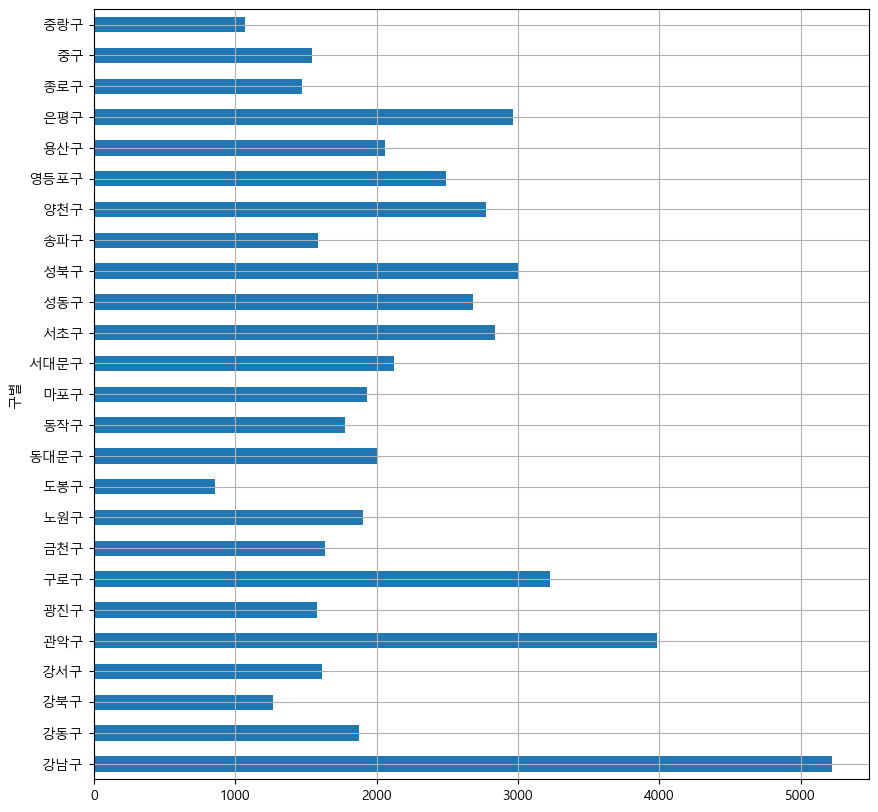

In [49]:
# matplotlib의 기본 폰트가 한글을 지원하지 않기 때문에 폰트를 재설정
# 운영체제별로 폰트의 위치가 다르므로 조건문을 이용해서 설정
# Windows의 경로를 설정할 때, / 로 디렉 구분해도 \로 변경해서 적용합니다.
if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
df['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 데이터를 정렬해서 막대그래프로 다시 그려보기

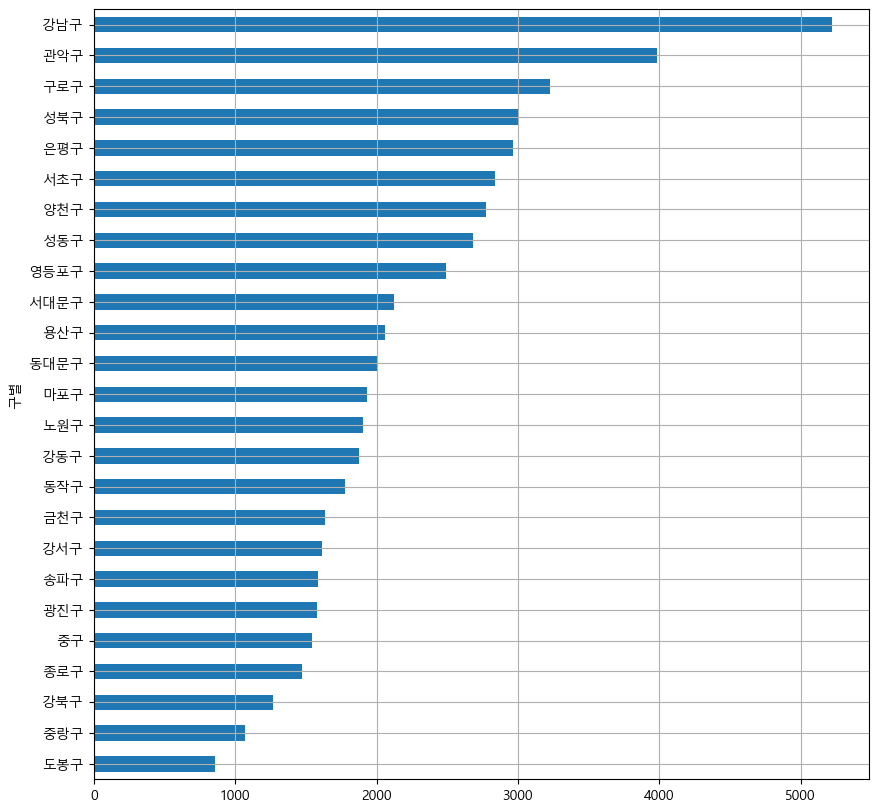

In [50]:
df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 인구수 대비 CCTV 비율을 만들어서 시각화해보자.

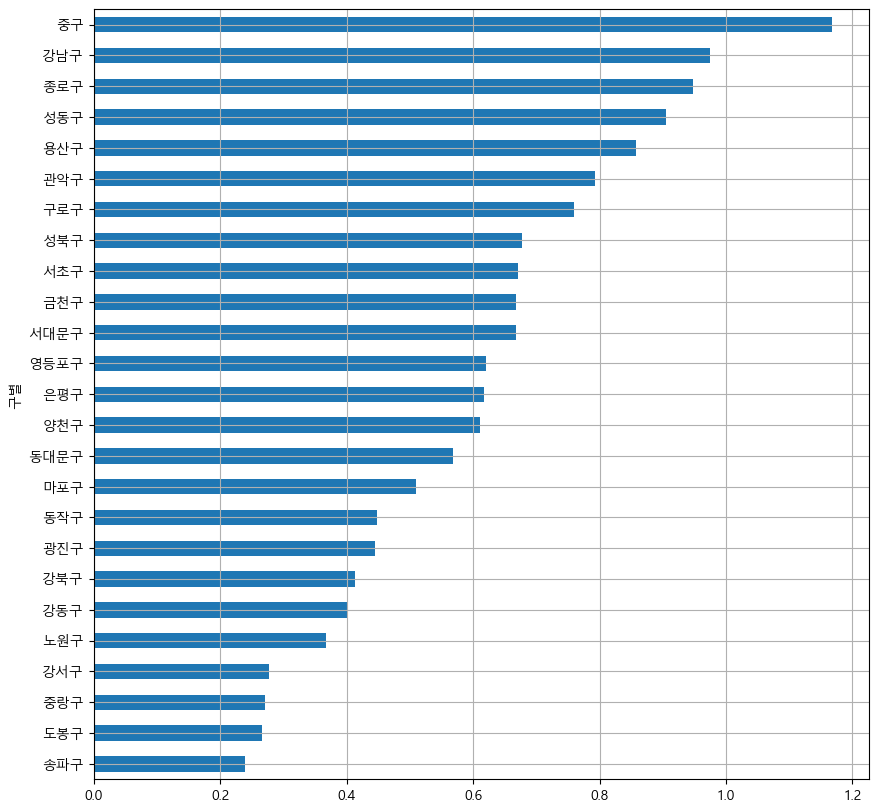

In [51]:
df['cctv비율']=df['소계']/df['계']*100
df['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 인구수와 CCTV 개수 사이에 연관성이 있는지 확인 - 산점도가 유용합니다.

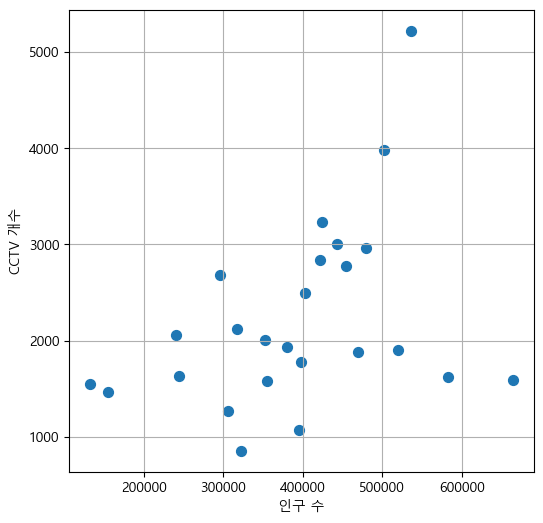

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(df['계'], df['소계'], s=50)
plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

### 추세선을 만들어보자.

In [54]:
# 2개 항목의 단항식을 구하기
fp1=np.polyfit(df['계'],df['소계'], 1)
f1=np.poly1d(fp1)
print(f1)

 
0.002892 x + 1087


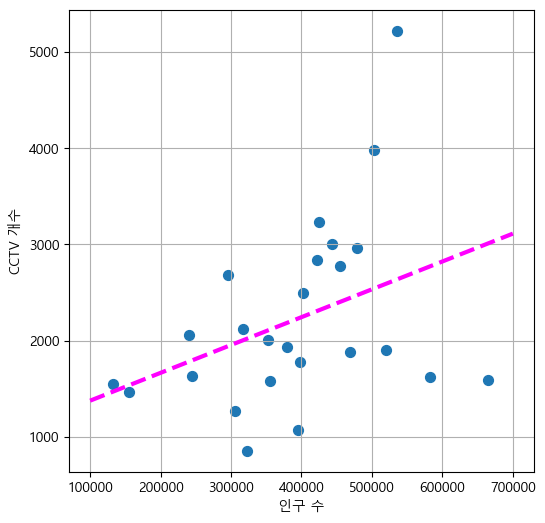

In [56]:
# 산점도 와 단항식을 같이 출력
fx=np.linspace(100000, 700000, 100)
plt.figure(figsize=(6,6))
plt.scatter(df['계'], df['소계'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='magenta')
plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

### 그래프에 추세선과의 차이를 출력해보자

 
0.002892 x + 1087


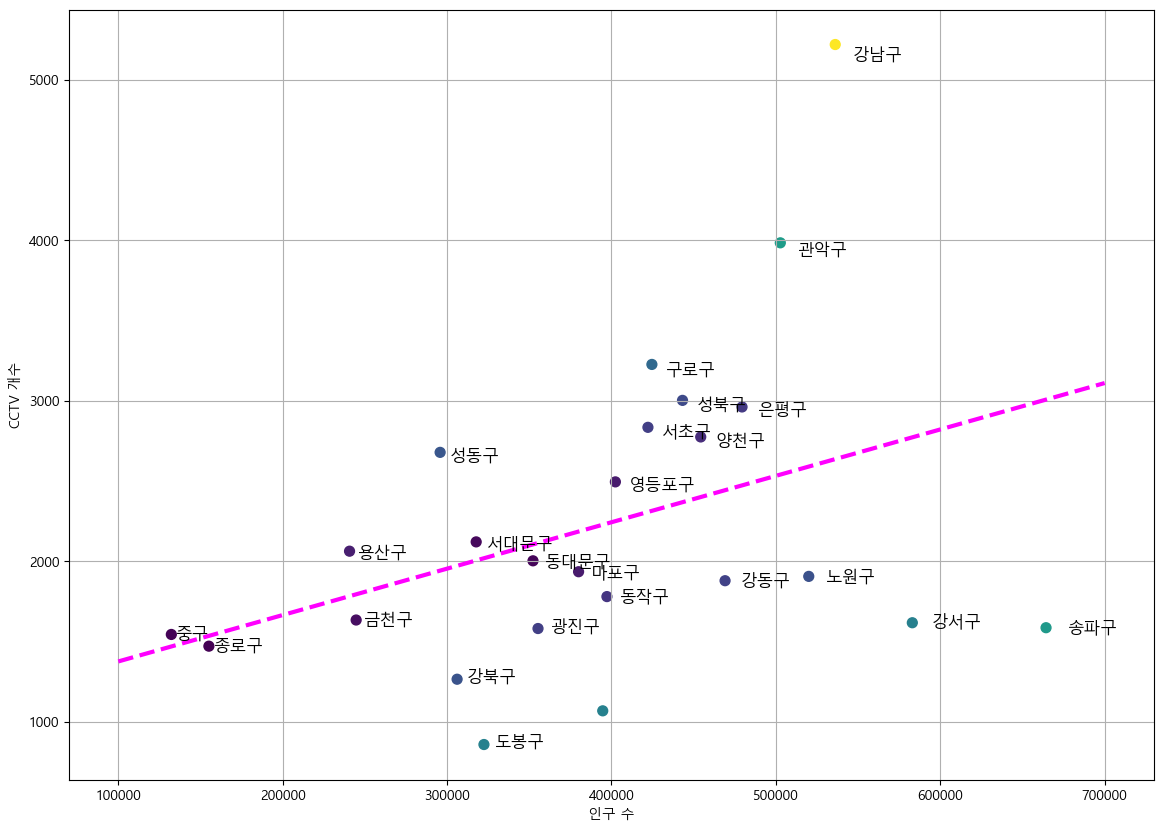

In [58]:
# 2개 항목의 단항식을 구하기
fp1=np.polyfit(df['계'],df['소계'], 1)
f1=np.poly1d(fp1)
print(f1)
# 산점도 와 단항식을 같이 출력
fx=np.linspace(100000, 700000, 100)
# 오차를 구해보자.
# 오차가 크다면 해당 추세선은 믿을 수 없다.
df['오차']=np.abs(df['소계']-f1(df['계'])) 
plt.figure(figsize=(14,10))
plt.scatter(df['계'], df['소계'],c=df['오차'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='magenta')
# 좌표를 지정해서 레이블을 출력하기
for n in range(24):
    plt.text(df['계'][n]*1.02, df['소계'][n]*0.98, df.index[n], fontsize=12)
plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

## 멀티 인덱스로 사용할 데이터 생성

In [64]:
mul_index=pd.MultiIndex.from_tuples([('cust_1', '2015'), ('cust_1', '2016'),
                                    ('cust_2', '2015'), ('cust_2', '2016')])
data=pd.DataFrame(data=np.arange(16).reshape(4,4),
                 index=mul_index, columns=['prd_1','prd_2','prd_3','prd_4'],
                  dtype='int')
print(data)

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15


cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32


In [67]:
data_stacked=data.stack(dropna=False)
print(data_stacked)

cust_1  2015  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2016  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2015  prd_1     8.0
              prd_2     9.0
              prd_3    10.0
              prd_4     NaN
        2016  prd_1    12.0
              prd_2    13.0
              prd_3    14.0
              prd_4     NaN
dtype: float64


In [68]:
data.loc['cust_2','prd_4']=np.nan
print(data_stacked)

cust_1  2015  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2016  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2015  prd_1     8.0
              prd_2     9.0
              prd_3    10.0
              prd_4     NaN
        2016  prd_1    12.0
              prd_2    13.0
              prd_3    14.0
              prd_4     NaN
dtype: float64


In [69]:
print(data_stacked.unstack(level=0))

            cust_1  cust_2
2015 prd_1     0.0     8.0
     prd_2     1.0     9.0
     prd_3     2.0    10.0
     prd_4     3.0     NaN
2016 prd_1     4.0    12.0
     prd_2     5.0    13.0
     prd_3     6.0    14.0
     prd_4     7.0     NaN


### 시계열 데이터 인덱스 만들기

In [70]:
data=pd.read_csv('./data/macrodata.csv')
data.head()
# year와 quarter를 합쳐 시계열 데이터를 만들어보자.

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [72]:
# 시계열 인덱스 생성
periods=pd.PeriodIndex(year=data['year'], quarter=data['quarter'], name='date')
print(periods)

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)


In [76]:
columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item')
# print(columns)
data=data.reindex(columns=columns)
print(data)

item    realgdp  infl  unemp
0      2710.349  0.00    5.8
1      2778.801  2.34    5.1
2      2775.488  2.74    5.3
3      2785.204  0.27    5.6
4      2847.699  2.31    5.2
..          ...   ...    ...
198   13324.600 -3.16    6.0
199   13141.920 -8.79    6.9
200   12925.410  0.94    8.1
201   12901.504  3.37    9.2
202   12990.341  3.56    9.6

[203 rows x 3 columns]


In [77]:
data.index=periods.to_timestamp('D', 'end')
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [78]:
Idata=data.stack().reset_index().rename(columns={0:'value'})
print(Idata)

                             date     item      value
0   1959-03-31 23:59:59.999999999  realgdp   2710.349
1   1959-03-31 23:59:59.999999999     infl      0.000
2   1959-03-31 23:59:59.999999999    unemp      5.800
3   1959-06-30 23:59:59.999999999  realgdp   2778.801
4   1959-06-30 23:59:59.999999999     infl      2.340
..                            ...      ...        ...
604 2009-06-30 23:59:59.999999999     infl      3.370
605 2009-06-30 23:59:59.999999999    unemp      9.200
606 2009-09-30 23:59:59.999999999  realgdp  12990.341
607 2009-09-30 23:59:59.999999999     infl      3.560
608 2009-09-30 23:59:59.999999999    unemp      9.600

[609 rows x 3 columns]


In [79]:
pivoted=Idata.pivot('date','item','value')
print(pivoted)

item                           infl    realgdp  unemp
date                                                 
1959-03-31 23:59:59.999999999  0.00   2710.349    5.8
1959-06-30 23:59:59.999999999  2.34   2778.801    5.1
1959-09-30 23:59:59.999999999  2.74   2775.488    5.3
1959-12-31 23:59:59.999999999  0.27   2785.204    5.6
1960-03-31 23:59:59.999999999  2.31   2847.699    5.2
...                             ...        ...    ...
2008-09-30 23:59:59.999999999 -3.16  13324.600    6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920    6.9
2009-03-31 23:59:59.999999999  0.94  12925.410    8.1
2009-06-30 23:59:59.999999999  3.37  12901.504    9.2
2009-09-30 23:59:59.999999999  3.56  12990.341    9.6

[203 rows x 3 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_19360\1864420323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted=Idata.pivot('date','item','value')


### Melt

In [83]:
data=pd.DataFrame({'cust_id':[1,2,3,4], 'prod_id':['a','b','c','d'],
                  'pch_cnt':[1,2,3,4],'pch_price':[100,200,300,400],
                  'pch_amt':[10,20,30,40]})
print(data)
result=pd.melt(data, id_vars=['cust_id','prod_id'])
print(result)

   cust_id prod_id  pch_cnt  pch_price  pch_amt
0        1       a        1        100       10
1        2       b        2        200       20
2        3       c        3        300       30
3        4       d        4        400       40
    cust_id prod_id   variable  value
0         1       a    pch_cnt      1
1         2       b    pch_cnt      2
2         3       c    pch_cnt      3
3         4       d    pch_cnt      4
4         1       a  pch_price    100
5         2       b  pch_price    200
6         3       c  pch_price    300
7         4       d  pch_price    400
8         1       a    pch_amt     10
9         2       b    pch_amt     20
10        3       c    pch_amt     30
11        4       d    pch_amt     40


### crosstab

In [91]:
data=pd.DataFrame({'id':['id1','id1','id1','id2','id2','id3'], 
                   'fac_1':['a','a','a','b','b','b'],
                  'fac_2':['c','c','d','d','d','d']})
#fac_1과 fac_2의 빈도 분석을 해봅시다.
print(pd.crosstab(data['fac_1'],data['fac_2'], rownames=['사실'], colnames=['거짓'], normalize=True))
print('\n\n')
print(pd.crosstab(data.id, [data['fac_1'],data['fac_2']]))

거짓         c         d
사실                    
a   0.333333  0.166667
b   0.000000  0.500000



fac_1  a     b
fac_2  c  d  d
id            
id1    2  1  0
id2    0  0  2
id3    0  0  1


## Data Pre Processing

In [94]:
# 첫 번째 행이 컬럼 이름이 아닌 경우,
df=pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns=['mpg','cylinders', 'displacement', 'horsepower', 'weight',
           'acceleration', 'model year', 'origin', 'name']
df.head()
print(df.dtypes)
df.info()

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [98]:
# horsepower 컬럼의 자료형을 float으로 변경하려 한다.
# df['horsepower']=df['horsepower'].astype('float')
# 데이터의 종류가 많지 않다면 중복제거 한 것을 print해서 봐보자.
# print(df['horsepower'].unique())
# ? 값을 NaN으로 설정하고, NaN인 데이터를 제거하자.
df['horsepower'].replace('?',np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower']=df['horsepower'].astype('float')
# 에러 없이 잘 되는 것을 확인할 수 있다.
print(df['horsepower'].unique())

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193. 100. 105. 175. 153. 180. 110.
  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92. 145.
 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.  52.
  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152. 102.
 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138. 135.
 142.  77.  62. 132.  84.  64.  74. 116.  82.]


In [101]:
df['origin'].replace({1:'미국', 2:'유럽', 3:'일본'}, inplace=True)
df['origin']=df['origin'].astype('category')# 범주형으로 변환
# df.head()
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_19360\3616737647.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000
